## Observations and Insights 

In [1]:
#Since "Googling" was used to solve some of the problem, providing the name of the sources:
#https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a
#http://www.python-ds.com/python-data-aggregation
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
combine_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
# Checking the number of mice.

#specifying the column with mouse information (mouse id)
#the unique mouse is saved in the variable as a list, and call the len function for length of list
mice = len(combine_data["Mouse ID"].unique())
mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"])]
mice_dup["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"],keep=False)]
mice_dup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#had to google how to index the value and remove them from the data
#Also created a variable to store the dropped duplicate data. incase Origninal df is needed
clean_data = combine_data
clean_df = clean_data[clean_data["Mouse ID"] == 'g989'].index
clean_data.drop(clean_df, inplace=True)


In [8]:
clean_data.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df_mouse = len(clean_data["Mouse ID"].unique())
clean_df_mouse

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
st_tb = clean_data.groupby("Drug Regimen")

tb_mean = st_tb['Tumor Volume (mm3)'].mean()
tb_median = st_tb['Tumor Volume (mm3)'].median()
tb_var = st_tb['Tumor Volume (mm3)'].var()
tb_std = st_tb['Tumor Volume (mm3)'].std()
tb_sem = st_tb['Tumor Volume (mm3)'].sem()

table_df = pd.DataFrame({"Tumor vol Mean": tb_mean, "Tumor vol Median": tb_median,
                         "Tumor vol Variance": tb_var, "Tumor Vol Std dev": tb_std,
                         "Tumor vol Std error" : tb_sem})
table_df



,Tumor vol Mean,Tumor vol Median,Tumor vol Variance,Tumor Vol Std dev,Tumor vol Std error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#http://www.python-ds.com/python-data-aggregation : was used to help to create aggregation
aggregation = {'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]}

groupby_tbl = clean_data.groupby("Drug Regimen")
groupby_tbl.agg(aggregation)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

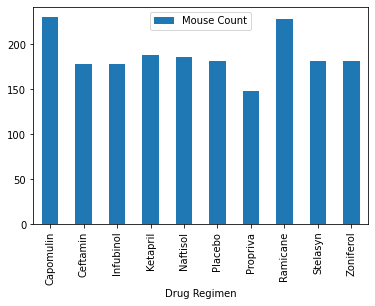

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_regimen = pd.DataFrame({"Mouse Count" : groupby_tbl["Mouse ID"].count()})
mouse_per_regimen

pandas_bar = mouse_per_regimen.plot.bar()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

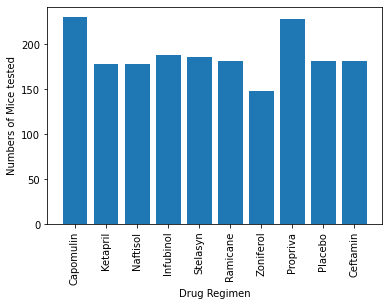

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = clean_data["Drug Regimen"].unique()
numb_mice = groupby_tbl["Mouse ID"].count()

plt.bar(drug_regimen, numb_mice,)
plt.xlabel("Drug Regimen")
plt.ylabel("Numbers of Mice tested")
plt.xticks(rotation='vertical')


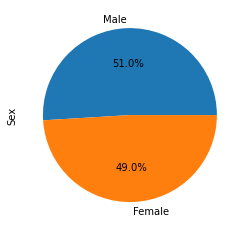

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data["Sex"].value_counts()
plot = gender.plot.pie(y= gender, autopct="%1.1f%%" )


([<matplotlib.patches.Wedge at 0x7f8229a66b20>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.034585741995461654, -1.149479806891197, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.019548462867000065, -0.6497059778080678, '51.0%')])

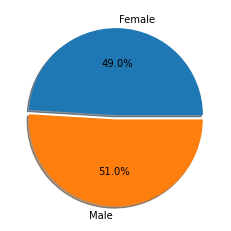

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data["Sex"].unique()
values = clean_data.groupby("Sex")["Mouse ID"].count()
explode = (0.0,0.05)
plt.pie(values, explode=explode ,labels=gender, autopct="%1.1f%%", shadow = True)


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#created a df on mouseid and timepoint 
max_tp = clean_data[["Mouse ID", "Timepoint"]]
max_tp = max_tp.groupby("Mouse ID")
#returning only the max value for timepoint per mouse ID
max_tp = max_tp.max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Merging the data to get the information on all the Max timepoint
#kind of like filtering for max timepoint
max_merge_df = pd.merge(max_tp, clean_data, on=["Mouse ID", "Timepoint"])
max_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# THIS CODE WAS PROVIDED BY THE INSTRUCTOR 
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_merge_df.loc[max_merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

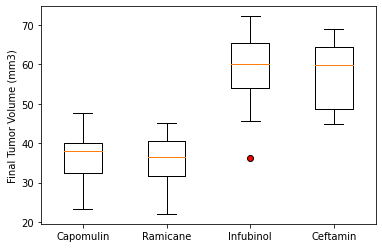

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker ='o', markerfacecolor='r')
plt.boxplot(tumor_vol_list , labels= treatment_list, flierprops=flierprops )
plt.ylabel("Final Tumor Volume (mm3)")



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment for l509')

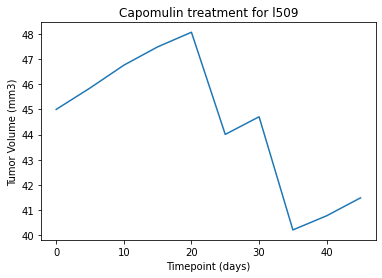

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#access data that only pertains to l509
l509 = clean_data.loc[clean_data["Mouse ID"] == "l509"]

#create a list of Timepoint for specified drug regimen
capomulin_Tp = l509.loc[l509["Drug Regimen"] == "Capomulin", "Timepoint"]

#create a list of tumor volume for specified drug regimen
tumor_vol_capomulin = l509.loc[l509["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]

#plot the data
plt.plot(capomulin_Tp,tumor_vol_capomulin)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment for l509")

Text(0.5, 1.0, 'mouse weight versus average tumor volume')

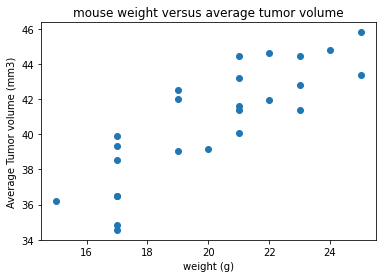

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

mice_cpmln = capomulin_df.groupby(["Mouse ID","Weight (g)"])
#converting the series into a df 
w_atm = mice_cpmln['Tumor Volume (mm3)'].mean().to_frame()
#reset index so weight can be used as the x-value
w_atm = w_atm.reset_index()

#create variable for the list that will used to used create scatter plot
x_values = w_atm["Weight (g)"]
y_values = w_atm['Tumor Volume (mm3)']


plt.scatter(x =x_values,y=y_values)
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.title("mouse weight versus average tumor volume")




## Correlation and Regression

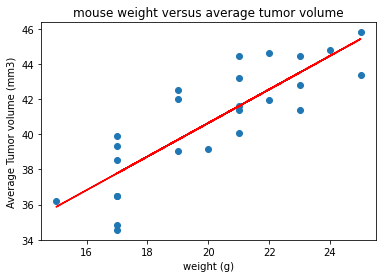

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x =x_values,y=y_values)
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.title("mouse weight versus average tumor volume")

#using module scipy to get the y=mx+b : slope, intercept.Perform a linear regression
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(x_values,y_values)
#creates the equation of line 
ln_reg = c_slope*x_values+c_int

plt.plot(x_values,ln_reg,color="red")


In [22]:
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation coefficient between weight and tumor volume is 0.84
